In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import gseapy as gp
import re
import sys 

import cptac
import cptac.utils as u

import plot_utils as p


/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#df = pd.read_csv(root+R'\all_heatmap.csv')
#all_df = pd.read_csv(root+R'\sig_pval_heatmap.csv')
all_df = pd.read_csv("Make_EGFR_Fig_1C/Pval_corr_table_Fig_1C_suppl_table2.csv")
all_df = all_df.drop(['Unnamed: 0'], axis=1)
all_df = all_df.set_index("Comparison")
all_df = all_df[1:] #Drop EGFR
all_df

,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Ovar,P_value_Ovar,Correlation_Brca,P_value_Brca,Correlation_Luad,P_value_Luad,Correlation_Hnscc,P_value_Hnscc,Correlation_Colon,P_value_Colon,Correlation_Lscc,P_value_Lscc
Comparison,,,,,,,,,,,,,,,,
PHLDA1_proteomics,0.816848,3.507071e-21,0.254436,0.060261,NaN,NaN,0.364797,0.002164,0.260110,0.074530,0.664271,8.888640e-12,0.386104,0.122847,0.713420,2.644826e-14
GRB2_proteomics,-0.610889,6.729990e-08,-0.217427,0.120342,-0.190090,0.346111,-0.177379,0.142733,-0.302439,0.020631,-0.532341,3.320092e-06,0.150960,0.347409,-0.198042,2.437176e-01
SOCS2_proteomics,0.562720,3.420388e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020297,9.557300e-01,NaN,NaN,0.472624,1.417921e-02
CDH4_proteomics,0.559180,3.420388e-06,0.148407,0.513490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAB2_proteomics,-0.556402,3.420388e-06,-0.076173,0.673774,0.076981,0.750510,0.326055,0.003543,-0.086403,0.597546,-0.208437,1.490980e-01,-0.147519,0.360266,-0.072496,7.501117e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF283_proteomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002610,9.941900e-01
TRIM39_proteomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002379,9.945224e-01
ADGRA3_proteomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002228,9.958381e-01


In [3]:

#all_df.iloc[:,1::2]

In [4]:
#Only include genes that have data for at least 6/8 genes.
#all_df = all_df.dropna(thresh=12, axis=0)

In [35]:
for index, row in all_df.iterrows():
    cancer_names = ['Gbm','Hnscc','Luad','Lscc','Brca','Ovar','kidney','Colon']
    label = []
    for cancer in cancer_names:
        if row['P_value_'+ cancer] < 0.05:
            label.append(str(cancer))
    labeled = '_'.join(label)
    #print(type(labeled))
    all_df.loc[index,'sig'] = str(labeled)
all_df

,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Ovar,P_value_Ovar,Correlation_Brca,P_value_Brca,Correlation_Luad,P_value_Luad,Correlation_Hnscc,P_value_Hnscc,Correlation_Colon,P_value_Colon,Correlation_Lscc,P_value_Lscc,sig,Num_sig
Comparison,,,,,,,,,,,,,,,,,,
PHLDA1_proteomics,0.816848,3.507071e-21,0.254436,0.060261,NaN,NaN,0.364797,0.002164,0.260110,0.074530,0.664271,8.888640e-12,0.386104,0.122847,0.713420,2.644826e-14,Gbm_Hnscc_Lscc_Brca,4
GRB2_proteomics,-0.610889,6.729990e-08,-0.217427,0.120342,-0.190090,0.346111,-0.177379,0.142733,-0.302439,0.020631,-0.532341,3.320092e-06,0.150960,0.347409,-0.198042,2.437176e-01,Gbm_Hnscc_Luad,3
SOCS2_proteomics,0.562720,3.420388e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020297,9.557300e-01,NaN,NaN,0.472624,1.417921e-02,Gbm_Lscc,2
CDH4_proteomics,0.559180,3.420388e-06,0.148407,0.513490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gbm,1
DAB2_proteomics,-0.556402,3.420388e-06,-0.076173,0.673774,0.076981,0.750510,0.326055,0.003543,-0.086403,0.597546,-0.208437,1.490980e-01,-0.147519,0.360266,-0.072496,7.501117e-01,Gbm_Brca,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF283_proteomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002610,9.941900e-01,,0
TRIM39_proteomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002379,9.945224e-01,,0
ADGRA3_proteomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002228,9.958381e-01,,0


In [36]:
def Pvalue_sig(row):
    numSig = 0

    for item in row:
        if pd.isnull(item):
            continue
        if item < 0.05: # changed from .1????
            numSig += 1
            
    return numSig

In [37]:
all_df["Num_sig"] = all_df.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_Hnscc","P_value_Lscc","P_value_Colon"]].apply(Pvalue_sig, axis = 1)
#all_df = all_df.sort_values(by=['Num_sig'],ascending=False)
all_df

,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Ovar,P_value_Ovar,Correlation_Brca,P_value_Brca,Correlation_Luad,P_value_Luad,Correlation_Hnscc,P_value_Hnscc,Correlation_Colon,P_value_Colon,Correlation_Lscc,P_value_Lscc,sig,Num_sig
Comparison,,,,,,,,,,,,,,,,,,
PHLDA1_proteomics,0.816848,3.507071e-21,0.254436,0.060261,NaN,NaN,0.364797,0.002164,0.260110,0.074530,0.664271,8.888640e-12,0.386104,0.122847,0.713420,2.644826e-14,Gbm_Hnscc_Lscc_Brca,4
GRB2_proteomics,-0.610889,6.729990e-08,-0.217427,0.120342,-0.190090,0.346111,-0.177379,0.142733,-0.302439,0.020631,-0.532341,3.320092e-06,0.150960,0.347409,-0.198042,2.437176e-01,Gbm_Hnscc_Luad,3
SOCS2_proteomics,0.562720,3.420388e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020297,9.557300e-01,NaN,NaN,0.472624,1.417921e-02,Gbm_Lscc,2
CDH4_proteomics,0.559180,3.420388e-06,0.148407,0.513490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gbm,1
DAB2_proteomics,-0.556402,3.420388e-06,-0.076173,0.673774,0.076981,0.750510,0.326055,0.003543,-0.086403,0.597546,-0.208437,1.490980e-01,-0.147519,0.360266,-0.072496,7.501117e-01,Gbm_Brca,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF283_proteomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002610,9.941900e-01,,0
TRIM39_proteomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002379,9.945224e-01,,0
ADGRA3_proteomics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002228,9.958381e-01,,0


In [38]:
#Keep trans genes that are significant in atleast 1 cancer. 

all_df1 = all_df[all_df['Num_sig'].isin([1,2,3,4,5,6,7,8])]
len(all_df1.index.unique())

6230

In [56]:
vc = all_df1['sig'].value_counts()
df = vc.to_frame()
df

,sig
Brca,1523
Gbm,731
Luad,552
kidney,487
Hnscc,337
...,...
Gbm_Brca_Ovar_kidney_Colon,1
Lscc_Brca_Ovar_kidney,1
Gbm_Luad_Brca_kidney_Colon,1
Hnscc_Luad_kidney_Colon,1


In [40]:
#df = df.loc[df['sig'] > 1]
#df

In [41]:
#ns = {'Colon': 0, 'Brca': 0, 'Lscc': 0, 'Ov': 0}
#ns_df = pd.DataFrame.from_dict(ns, orient = 'index', columns=['sig'])
#ns_df

In [42]:
#both = df.append(ns_df)
df = df.reset_index()
df1 = df.rename(columns = {'index': 'cancer'})
df1.head(20)


,cancer,sig
0,Brca,1523
1,Gbm,731
2,Luad,552
3,kidney,487
4,Hnscc,337
5,Colon,259
6,Gbm_Brca,257
7,Lscc,180
8,Luad_Brca,155
9,Brca_kidney,144


In [44]:
s = [0,1,2,3,4,5,7,12,6,8,9,10,11,13,14,15,16,17,18,19]
df_reindex = df1.reindex(s)
both = df_reindex
both

,cancer,sig
0,Brca,1523
1,Gbm,731
2,Luad,552
3,kidney,487
4,Hnscc,337
5,Colon,259
7,Lscc,180
12,Ovar,80
6,Gbm_Brca,257
8,Luad_Brca,155


# dumbbell

In [45]:
# Create df with location of cancer points

# 'Gbm': 7, 'Hnscc': 6, 'En': 5, 'Luad': 4, 'Ov': 3, 'Lscc': 2, 'Brca': 1, 'Colon': 0,

y1 = {'Brca': 7,'Gbm': 6,  'Luad': 5,'Kidney': 4,'Hnscc': 3, 'Lscc': 2,  'Colon': 1,'Ov': 0,
      "Gbm_Brca" :7,'Gbm_Hnscc': 7, 'Gbm_En': 7, 'Hnscc_En': 6, 'Hnscc_Luad': 6, 'Gbm_Luad': 7, 
      'Gbm_Hnscc_En': 7, 'Gbm_Hnscc_Luad': 7}

y2= {'Brca': 7,'Gbm': 6, 'Luad': 5,  'Kidney': 4,'Hnscc': 3,'Lscc': 2,  'Colon': 1,'Ov': 0,
     "Gbm_Brca" :6,'Gbm_Hnscc': 6, 'Gbm_En': 5, 'Hnscc_En': 5, 'Hnscc_Luad': 4, 'Gbm_Luad': 4, 
     'Gbm_Hnscc_En': 6, 'Gbm_Hnscc_Luad': 6}

y3= {'Brca': 7,'Gbm': 6,'Luad': 5 , 'Kidney': 4, 'Hnscc': 3,'Lscc': 2, 'Colon': 1,  'Ov': 0, 
     "Gbm_Brca" :6,'Gbm_Hnscc': 6, 'Gbm_En': 5, 'Hnscc_En': 5, 'Hnscc_Luad': 4, 'Gbm_Luad': 4, 
     'Gbm_Hnscc_En': 5, 'Gbm_Hnscc_Luad': 4}
        

y1_df = pd.DataFrame.from_dict(y1, orient = 'index', columns=['y1'])
y2_df = pd.DataFrame.from_dict(y2, orient = 'index', columns=['y2'])
y3_df = pd.DataFrame.from_dict(y3, orient = 'index', columns=['y3'])
ordered_df = y1_df.join(y2_df)
ordered_df = ordered_df.join(y3_df)
ordered_df

,y1,y2,y3
Brca,7,7,7
Gbm,6,6,6
Luad,5,5,5
Kidney,4,4,4
Hnscc,3,3,3
Lscc,2,2,2
Colon,1,1,1
Ov,0,0,0
Gbm_Hnscc,7,6,6
Gbm_En,7,5,5


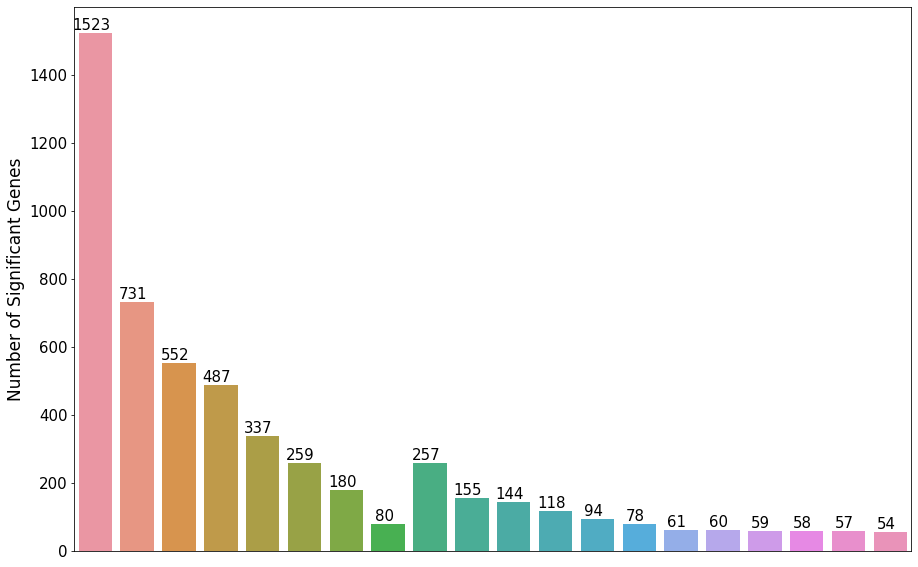

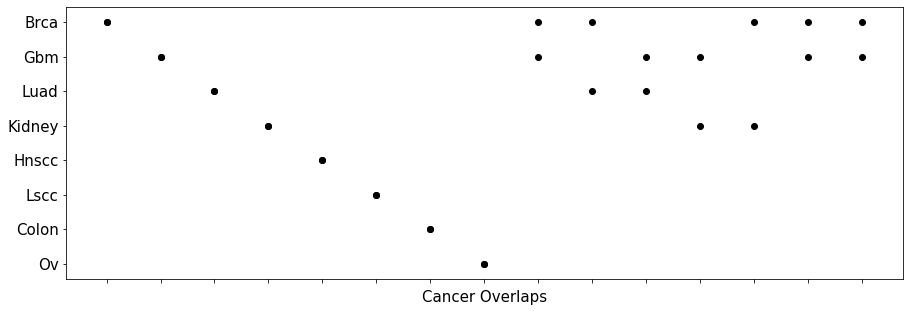

In [54]:
# Create histogram

# add a subplot with no frame
plt.figure(figsize=(15,10))
o = sns.barplot(x=both['cancer'], y=both['sig'], data=both)#, order=None, hue_order=None, estimator=<function mean at 0x105c7d9e0>, ci=95, n_boot=1000, units=None, seed=None, orient=None,
plt.setp(o.get_xticklabels(),rotation=90)

# Add count of sig genes above each bar
for p in o.patches:
    o.annotate('{:.0f}'.format(p.get_height()), xy = (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom', color= 'black',size = 15)


o.set_xlabel('', size = 15)
o.set_ylabel('Number of Significant Genes', size = 17)
o.get_xaxis().set_visible(False) # Hide x-axis
o.yaxis.set_tick_params(labelsize=15)


# Create vertical dumbell plot using scatterplots
plt.rcParams.update({'font.size': 15})
d = plt.figure(figsize=(15,5))
my_range=range(1,len(ordered_df.index)+1) #range count for x axis num
#d = plt.vlines(x=my_range, ymin=ordered_df['y1'], ymax=ordered_df['y2'], color='black', alpha=0.5) #vertical lines
#d = plt.vlines(x=my_range, ymin=ordered_df['y2'], ymax=ordered_df['y3'], color='black', alpha=0.5)
d = plt.scatter(my_range, ordered_df['y1'], color='black', alpha=1) #plots first point
d = plt.scatter(my_range, ordered_df['y2'], color='black', alpha=1) # plots second point
#d = plt.scatter(my_range, ordered_df['y3'], color='black', alpha=1) # plots third point


# Add title and axis names
labels = list(ordered_df.index[:8]) # label 8 single cancer names y axis
labels.reverse()
plt.xticks(my_range, []) #none for x axis
plt.yticks(range(0,8), labels) # single cancer names
#plt.ylabel('Cancer')
plt.xlabel('Cancer Overlaps')

#o.savefig("PTEN_Fig_1_barplot.png", dpi = 300)
d.figure.savefig("EGFR_Fig_1_checkerboard.png", dpi = 300)


In [ ]:
both